Python version: 3.9.13

In [8]:
#|default_exp app

In [31]:
!pip install -Uqq fastai
!pip install gradio
!pip install nbdev 

You should consider upgrading via the 'D:\Anaconda\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'D:\Anaconda\python.exe -m pip install --upgrade pip' command.


In [14]:
#|export
from fastai.vision.all import *
import gradio as gr
import pathlib

def is_cat(x): return x[0].isupper() 

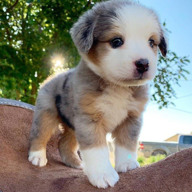

In [11]:
im = PILImage.create('dog.jpg')
im.thumbnail((192,192))
im

In [15]:
#|export
#This is an encapsulating function to convert PosixPath to WindowsPath for Windows users.
def windows_path(model_path):
    temp = pathlib.PosixPath
    pathlib.PosixPath = pathlib.WindowsPath
    learn = load_learner(model_path)
    pathlib.PosixPath = temp # setting it back to temp to prevent future errors
    return learn

In [16]:
#|export
#This model.pkl is created in 'dogs_cats.ipynb'. It can be checked out in this repository.
learn = windows_path('model.pkl')

In [17]:
learn.predict(im)

('False', TensorBase(0), TensorBase([9.9925e-01, 7.4978e-04]))

In [20]:
#|export
categories = ('Dog', 'Cat')
def classify_image(img):
    pred,idx,probs= learn.predict(img)
    return dict(zip(categories, map(float,probs)))

In [21]:
classify_image(im)

{'Dog': 0.9992502331733704, 'Cat': 0.0007497832411900163}

In [24]:
#| export
image = gr.inputs.Image(shape=(192,192))
label = gr.outputs.Label()
examples = ['dog.jpg', 'cat.jpg', 'confusing.jfif']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

D:\Anaconda\lib\site-packages\gradio\inputs.py:256: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
D:\Anaconda\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
D:\Anaconda\lib\site-packages\gradio\outputs.py:196: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
D:\Anaconda\lib\site-packages\gradio\deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.


(<gradio.routes.App at 0x141b97dc520>, 'http://127.0.0.1:7862/', None)

In [25]:
m = learn.model

In [26]:
ps = list(list(m.parameters()))

In [27]:
ps[1]

Parameter containing:
tensor([ 2.3602e-01,  2.6620e-01, -5.1096e-08,  5.1780e-01,  3.4404e-09,
         2.2351e-01,  4.2384e-01,  1.3153e-07,  2.5243e-01,  1.5152e-06,
         3.1612e-01,  2.5005e-01,  3.8002e-01,  1.0862e-05,  2.7639e-01,
         2.3645e-01,  2.4118e-01,  3.9558e-01,  4.7005e-01,  2.9053e-01,
         2.7123e-01,  2.7771e-01,  2.8978e-01,  2.0658e-01,  2.5869e-01,
         2.7924e-01,  2.9095e-01,  3.1561e-01,  3.8772e-01,  3.0356e-01,
         2.6692e-01,  2.1027e-01,  2.8652e-01,  3.3263e-01,  4.2728e-01,
         3.7253e-01,  7.4804e-08,  1.9162e-01,  1.4740e-08,  2.2369e-01,
         1.7821e-01,  2.4924e-01,  2.7441e-01,  2.5755e-01,  2.9493e-01,
         2.9955e-01,  2.2419e-01,  2.6220e-01,  2.2001e-08,  2.6723e-01,
         2.2098e-01,  2.8511e-01,  3.3102e-01,  2.2716e-01,  3.6603e-01,
         2.1283e-01,  2.3954e-01,  2.4995e-01,  5.2542e-01,  2.4923e-01,
         2.9420e-01,  2.5877e-01,  4.8219e-01,  2.6553e-01],
       requires_grad=True)

In [28]:
ps[0].shape

torch.Size([64, 3, 7, 7])

In [29]:
ps[0]

Parameter containing:
tensor([[[[-1.0333e-02, -6.0496e-03, -1.7107e-03,  ...,  5.6710e-02,
            1.7161e-02, -1.2622e-02],
          [ 1.1166e-02,  9.6025e-03, -1.0984e-01,  ..., -2.7115e-01,
           -1.2901e-01,  3.7984e-03],
          [-6.8633e-03,  5.9153e-02,  2.9552e-01,  ...,  5.1976e-01,
            2.5637e-01,  6.3621e-02],
          ...,
          [-2.7504e-02,  1.6066e-02,  7.2609e-02,  ..., -3.3280e-01,
           -4.2053e-01, -2.5777e-01],
          [ 3.0633e-02,  4.0957e-02,  6.2855e-02,  ...,  4.1387e-01,
            3.9362e-01,  1.6609e-01],
          [-1.3732e-02, -3.7039e-03, -2.4102e-02,  ..., -1.5069e-01,
           -8.2229e-02, -5.7755e-03]],

         [[-1.1289e-02, -2.6509e-02, -3.4505e-02,  ...,  3.2639e-02,
            7.5986e-04, -2.5665e-02],
          [ 4.5784e-02,  3.3698e-02, -1.0441e-01,  ..., -3.1242e-01,
           -1.6041e-01, -1.2143e-03],
          [-7.3990e-04,  9.8505e-02,  4.0218e-01,  ...,  7.0795e-01,
            3.6893e-01,  1.2461e-01]

# export

To learn more about nbdev, you can go to https://github.com/fastai/nbdev 

In [1]:
from nbdev.export import notebook2script

ImportError: cannot import name 'notebook2script' from 'nbdev.export' (D:\Anaconda\lib\site-packages\nbdev\export.py)

In [ ]:
notebook2script('app.ipynb')